## Import data CSV files and show example

## Load packages

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

## Load data

In [2]:
# Set up dictionary for CSV files
csv_files = dict()

# Load files into dictionary
filenames = os.listdir('./data_csv')
for file in filenames:
    filename, file_extension = os.path.splitext(f'./data_csv/{file}')
    # Remove path from filenmaes and load data
    if file_extension == '.csv':
        filename_short = filename.split('/')[-1]
        csv_files[filename_short] = pd.read_csv(f'./data_csv/{file}')

# Load meta data and transform
metadata = pd.read_csv('./data_csv/metadata.csv', index_col='parameter')
csv_index = list(metadata)

## Show example (first record)

### Show metadata

In [3]:
# Get filename for first record
index = csv_index[0]

In [4]:
metadata[index]

parameter
pH                    7.34
BDecf                 5.02
pCO2                  4.90
BE                   -5.80
Apgar1                9.00
Apgar5               10.00
NICU days             0.00
Seizures              0.00
HIE                   0.00
Intubation            0.00
Main diag.            0.00
Other diag.           0.00
Gest. weeks          39.00
Weight(g)          3850.00
Sex                   1.00
Age                  33.00
Gravidity             1.00
Parity                0.00
Diabetes              0.00
Hypertension          0.00
Preeclampsia          0.00
Liq.                  0.00
Pyrexia               0.00
Meconium              0.00
Presentation          1.00
Induced               0.00
I.stage             480.00
NoProgress            0.00
CK/KP                 0.00
II.stage             30.00
Deliv. type           1.00
dbID            1062845.00
Rec. type             1.00
Pos. II.st.       14400.00
Sig2Birth             0.00
Name: 1277, dtype: float64

### Show time series data

In [5]:
csv_files[index].head()

,seconds,FHR,UC
0,0,146.75,20.5
1,1,151.00,19.0
2,2,151.00,18.5
3,3,151.75,19.0
4,4,147.00,24.5


### Plot time series data

In [6]:
example = csv_files[index]

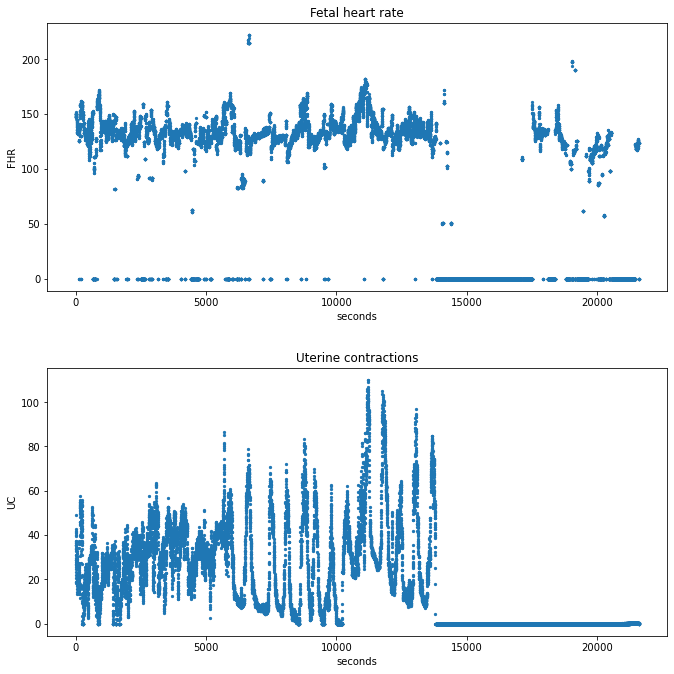

In [7]:
fig = plt.figure(figsize=(10,10))

# Plot fetal heart rate
ax1 = fig.add_subplot(2,1,1)
x = example['seconds']
y1 = example['FHR']
ax1.scatter(x, y1, s=5)
ax1.set_xlabel('seconds')
ax1.set_ylabel('FHR')
ax1.set_title('Fetal heart rate')

# Plot contractions
ax2 = fig.add_subplot(2,1,2)
x = example['seconds']
y2 = example['UC']
ax2.scatter(x, y2, s=5)
ax2.set_xlabel('seconds')
ax2.set_ylabel('UC')
ax2.set_title('Uterine contractions')

plt.tight_layout(pad=3)
plt.show()